In [1]:
import pandas as pd 
from pandas.plotting import scatter_matrix

df = pd.read_csv("youth_smoke_and_drug_usage.csv")

print(df.describe())

               Year  Smoking_Prevalence  Drug_Experimentation  Peer_Influence  \
count  10000.000000        10000.000000          10000.000000    10000.000000   
mean    2022.000500           27.439257             40.150182        5.440100   
std        1.425027           12.975528             17.515917        2.863151   
min     2020.000000            5.000000             10.000000        1.000000   
25%     2021.000000           16.160000             24.920000        3.000000   
50%     2022.000000           27.355000             40.100000        5.000000   
75%     2023.000000           38.672500             55.462500        8.000000   
max     2024.000000           50.000000             69.990000       10.000000   

       Family_Background  Mental_Health  Parental_Supervision  \
count       10000.000000   10000.000000          10000.000000   
mean            5.513300       5.469800              5.528000   
std             2.865038       2.879326              2.891514   
min       

In [2]:
df.dropna() #ensuring all of the data is captured and none of them is missing

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2023,10-14,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023,15-19,Male,49.17,10.21,Low,7,Yes,4,5,No,7,Yes,2,9
9996,2020,80+,Female,48.00,30.85,Middle,8,Yes,8,8,No,4,Yes,8,9
9997,2021,25-29,Both,47.62,39.54,High,1,No,7,2,Yes,1,No,5,10
9998,2022,40-49,Male,9.37,11.64,Low,7,No,10,1,No,2,Yes,10,4


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn import neighbors

# Manually assigning numerical values to social economics
socioeconomic_mapping = {
    'High': 2, #I assigned High as two to show that it is the highest status
    'Middle': 1, #assigned middle as 1 to show its the middle status
    'Low': 0 #assigned low as 0 to show it is the lowest status
}



#Setting the new values 
df["Socioeconomic_Status"] = df["Socioeconomic_Status"].replace(socioeconomic_mapping).infer_objects(copy=False)


relevant_columns = ["Socioeconomic_Status", "Drug_Experimentation", "Mental_Health", "Smoking_Prevalence"]

df_fitlered = df[relevant_columns]




#checking all the dataframe data types
print(df_fitlered.dtypes)

#splitting the data 
X = df_fitlered.drop(columns=["Drug_Experimentation", "Smoking_Prevalence"])  # Dropping target column to make a new column with all of the other data
y = df_fitlered[["Drug_Experimentation", "Smoking_Prevalence"]]  # Target column, making this the only column



Socioeconomic_Status      int64
Drug_Experimentation    float64
Mental_Health             int64
Smoking_Prevalence      float64
dtype: object


/tmp/ipykernel_43414/662675629.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Socioeconomic_Status"] = df["Socioeconomic_Status"].replace(socioeconomic_mapping).infer_objects(copy=False)


In [4]:
#The train and test split. Making the test size only 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the training data and the testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



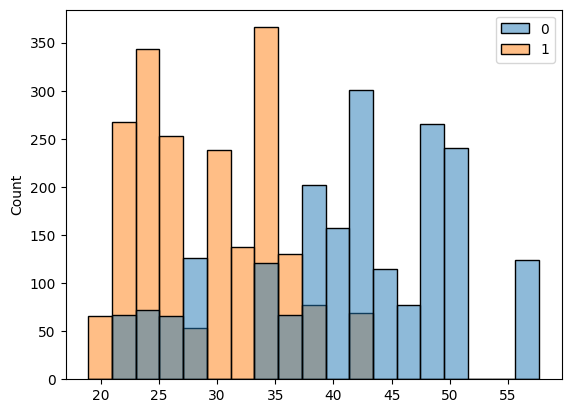

In [5]:
from sklearn.neighbors import KNeighborsRegressor #Using regression for the KNN model to base the likely hood of drug use with percentages(float)

#Initizial the model
knn = KNeighborsRegressor(n_neighbors=5)
#Wrapping knn in a multiOutputRegressor
multi_knn_output = MultiOutputRegressor(knn)
def train_and_predict():
    multi_knn_output.fit(X_train, y_train)
    return multi_knn_output.predict(X_test)

y_pred = train_and_predict()  # Defined globally
#Early Plot of the prediction model
sns.histplot(y_pred)
plt.show()
# 0 is for drug Experimentation
# 1 is for smoking prevelance

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

#printing the mean squared error, estimating how far the prediction is from the true values
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

#printing r2 score, estimating the variance
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 297.21626035099996
R² Score: -0.23648882319442888


In [7]:
#optimizing the model

from sklearn.model_selection import GridSearchCV

#defining the parameter grid
param_grid = {'n_neighbors':range(1,20)}

#Perform grid search 
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#printing the best parameters
print("Best Parameters: ", grid_search.best_params_)

#creating new standard for the model
best_knn_regressor = grid_search.best_estimator_


Best Parameters:  {'n_neighbors': 19}


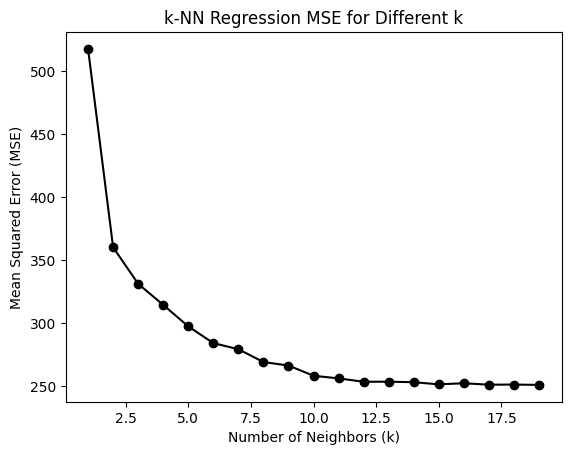

In [8]:
#Anazlying the model, using all of the predictors Socioeconomic_status & Mental Health
#Testing the different values from K 

mse_values = []

for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)  # Defining KNeighborsRegressor
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)  
    mse_values.append(mse)

# Plot MSE vs k
plt.plot(range(1, 20), mse_values, marker='o', color='black')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("k-NN Regression MSE for Different k")
plt.show()
    

In [9]:
#the mean square for both targets
mse_drug = mean_squared_error(y_test["Drug_Experimentation"], y_pred[:, 0]) #for Drug Experimentation
mse_smoking = mean_squared_error(y_test["Smoking_Prevalence"], y_pred[:, 1]) #for smoking prevelance

print(f"Mean Squared Error for Drug Experimentation: {mse_drug}")
print(f"Mean Squared Error for Drug Experimentation: {mse_smoking}")

Mean Squared Error for Drug Experimentation: 322.5969908286703
Mean Squared Error for Drug Experimentation: 178.83323756066483


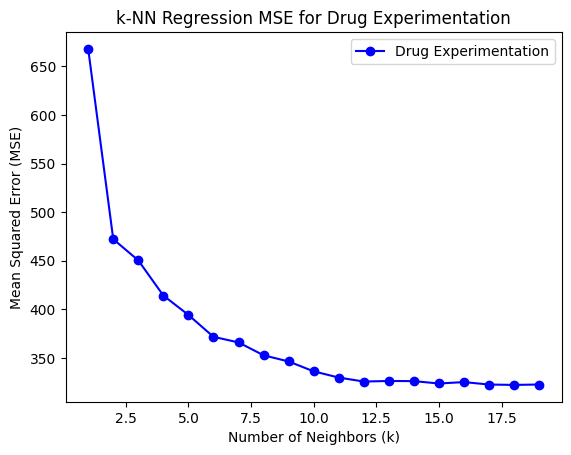

In [10]:
#Plotting the predictions compared to the true values for both targets
mse_drug = []

# Loop through k values to calculate MSE for Drug Experimentation predictions
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)  # Defining KNeighborsRegressor
    knn.fit(X_train, y_train["Drug_Experimentation"])  # Use Drug Experimentation target
    y_pred_drug = knn.predict(X_test)  # Predictions for Drug Experimentation
    mse = mean_squared_error(y_test["Drug_Experimentation"], y_pred_drug)  # Calculate MSE
    mse_drug.append(mse)  # Append MSE to the list

# Plot MSE vs k for Drug Experimentation
plt.plot(range(1, 20), mse_drug, marker='o', color='blue', label="Drug Experimentation")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("k-NN Regression MSE for Drug Experimentation")
plt.legend()
plt.show()




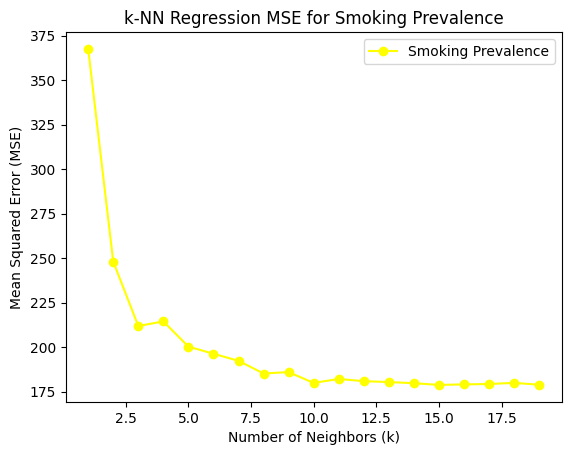

In [11]:
#Plotting the predictions compared to the true values for both targets
mse_smoking = []

# Loop through k values to calculate MSE for Drug Experimentation predictions
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)  # Defining KNeighborsRegressor
    knn.fit(X_train, y_train["Smoking_Prevalence"])  # Use Drug Experimentation target
    y_pred_smoking = knn.predict(X_test)  # Predictions for Drug Experimentation
    mse = mean_squared_error(y_test["Smoking_Prevalence"], y_pred_smoking)  # Calculate MSE
    mse_smoking.append(mse)  # Append MSE to the list

# Plot MSE vs k for Drug Experimentation
plt.plot(range(1, 20), mse_smoking, marker='o', color='yellow', label="Smoking Prevalence")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("k-NN Regression MSE for Smoking Prevalence")
plt.legend()
plt.show()

/tmp/ipykernel_43414/1321089225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitlered["Combined_Risk"] = df_fitlered["Smoking_Prevalence"] + df_fitlered["Drug_Experimentation"]


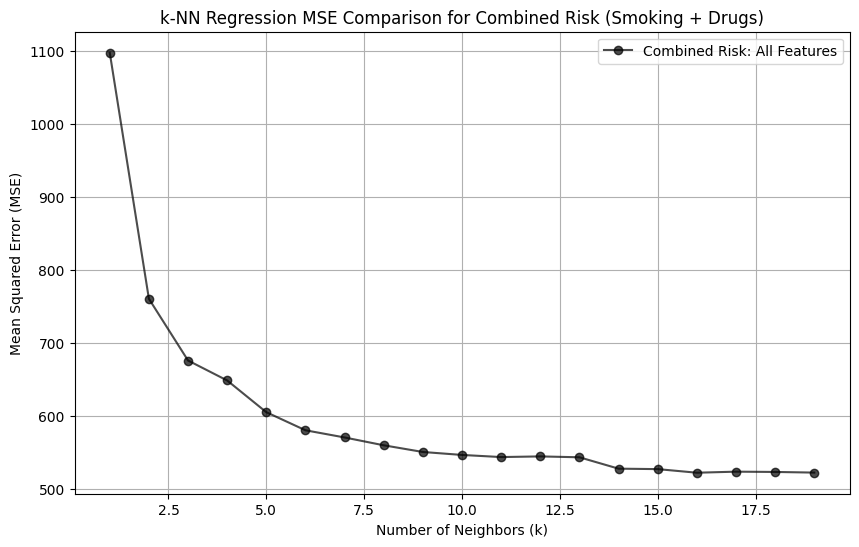

In [12]:
# Recreating the first prediction because the numbers felt too small to be accurate 
# Create a combined target variable
df_fitlered["Combined_Risk"] = df_fitlered["Smoking_Prevalence"] + df_fitlered["Drug_Experimentation"]

# Perform train/test split for the combined risk
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    df_fitlered[["Socioeconomic_Status", "Mental_Health"]],  # Predictor
    df_fitlered["Combined_Risk"],  # Combined target
    test_size=0.2,
    random_state=42
)

mse_values_combined = []  # All features

# Train and calculate MSE for Combined Risk predictions for all features
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_combined, y_train_combined)  # Train on all features
    y_pred_combined = knn.predict(X_test_combined)  # Predict combined risk
    mse_combined = mean_squared_error(y_test_combined, y_pred_combined)  # Compute MSE
    mse_values_combined.append(mse_combined)

plt.figure(figsize=(10, 6))

# Plot for Combined Risk
plt.plot(range(1, 20), mse_values_combined, marker='o', color='black', alpha=0.7, label="Combined Risk: All Features")


plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("k-NN Regression MSE Comparison for Combined Risk (Smoking + Drugs)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [13]:
#To explore and make more sense of the columns I have chosen for this prediction
#I am breaking it down and will compare all of them
#The next cell will be Mental_health as the main feature to determine this.

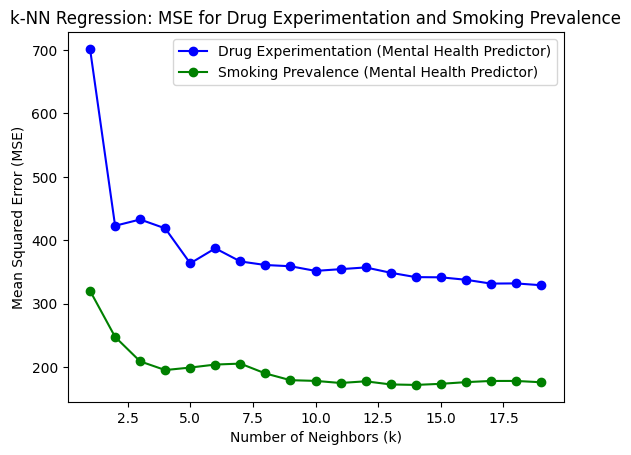

In [14]:
#Mental Health as the main contributer of the predictor

# Check if all required columns are there
if 'Mental_Health' in df_fitlered.columns and 'Drug_Experimentation' in df_fitlered.columns and 'Smoking_Prevalence' in df_fitlered.columns:
    # Ensure no missing or invalid values
    df_fitlered = df_fitlered.dropna(subset=['Mental_Health', 'Drug_Experimentation', 'Smoking_Prevalence'])

    # Perform the train/test split
    X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(
        df_fitlered[['Mental_Health']],  # Predictor
        df_fitlered[['Drug_Experimentation', 'Smoking_Prevalence']],  # Targets
        test_size=0.2,
        random_state=42
    )
else:
    print("Required columns not found in df_fitlered.")

# Scale the features
X_train_mental_scaled = scaler.fit_transform(X_train_mental)
X_test_mental_scaled = scaler.transform(X_test_mental)

# Training and evaluating the model
mse_values_mental_drug = []
mse_values_mental_smoking = []

for k in range(1, 20):
    # Use MultiOutputRegressor for multi-target regression
    knn = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=k))
    knn.fit(X_train_mental_scaled, y_train_mental)
    y_pred_mental = knn.predict(X_test_mental_scaled)

    # Calculate MSE for both targets
    mse_drug = mean_squared_error(y_test_mental['Drug_Experimentation'], y_pred_mental[:, 0])
    mse_smoking = mean_squared_error(y_test_mental['Smoking_Prevalence'], y_pred_mental[:, 1])

    mse_values_mental_drug.append(mse_drug)
    mse_values_mental_smoking.append(mse_smoking)

# Plot results
plt.plot(range(1, 20), mse_values_mental_drug, marker='o', label="Drug Experimentation (Mental Health Predictor)", color='blue')
plt.plot(range(1, 20), mse_values_mental_smoking, marker='o', label="Smoking Prevalence (Mental Health Predictor)", color='green')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("k-NN Regression: MSE for Drug Experimentation and Smoking Prevalence")
plt.legend()
plt.show()

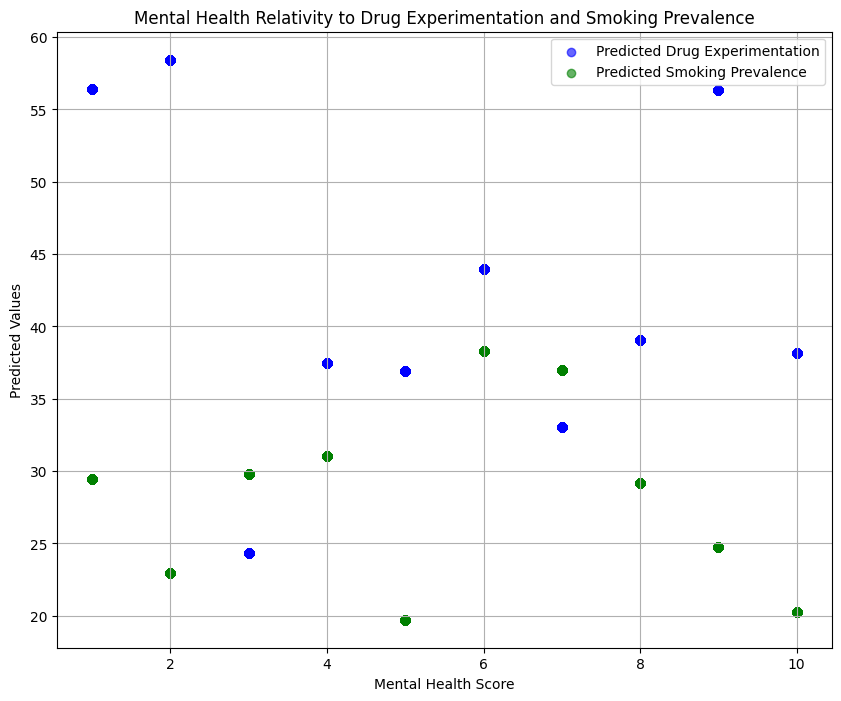

In [15]:
# Showing Mental Health Data Trained set with more exact plot in relation of the data values

# Train a MultiOutputRegressor for both targets
knn_mental = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=3))  
knn_mental.fit(X_train_mental, y_train_mental)

# Make predictions
y_pred_mental = knn_mental.predict(X_test_mental)

# Plot Mental Health score vs Predicted Drug Experimentation and Smoking Prevalence
plt.figure(figsize=(10, 8))

# Predicted Drug Experimentation
plt.scatter(
    X_test_mental, y_pred_mental[:, 0], 
    color='blue', alpha=0.6, label='Predicted Drug Experimentation'
)

# Predicted Smoking Prevalence
plt.scatter(
    X_test_mental, y_pred_mental[:, 1], 
    color='green', alpha=0.6, label='Predicted Smoking Prevalence'
)


plt.xlabel("Mental Health Score")
plt.ylabel("Predicted Values")
plt.title("Mental Health Relativity to Drug Experimentation and Smoking Prevalence")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


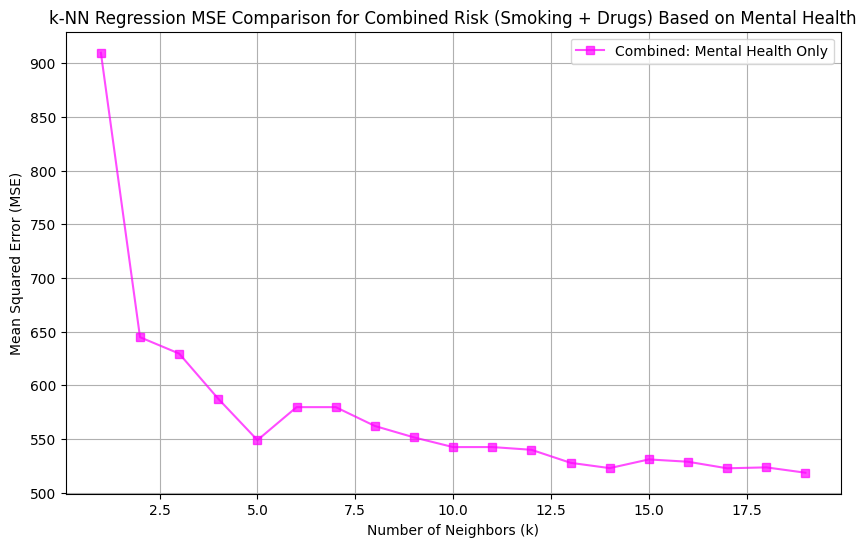

In [16]:
# Train and calculate MSE for Combined Risk predictions (Smoking + Drug) based on Mental Health score
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(
    df_fitlered[["Mental_Health"]],  # Mental Health as predictor
    df_fitlered["Combined_Risk"],  # Combined target
    test_size=0.2,
    random_state=42
)

# Initialize list for storing MSE values
mse_values_mental_combined = []

# Training and calculating MSE for different k values in k-NN
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_mental, y_train_mental)  # Train model with Mental Health as the predictor
    y_pred_mental_combined = knn.predict(X_test_mental)  # Make predictions for Combined Risk
    mse_combined_mental = mean_squared_error(y_test_mental, y_pred_mental_combined)  # Compute MSE
    mse_values_mental_combined.append(mse_combined_mental)


plt.figure(figsize=(10, 6))

# Plot, MSE compared to number of neighbors for combined risk
plt.plot(range(1, 20), mse_values_mental_combined, marker='s', color='magenta', alpha=0.7, label="Combined: Mental Health Only")


plt.xlabel("Number of Neighbors (k)") 
plt.ylabel("Mean Squared Error (MSE)")  
plt.title("k-NN Regression MSE Comparison for Combined Risk (Smoking + Drugs) Based on Mental Health")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

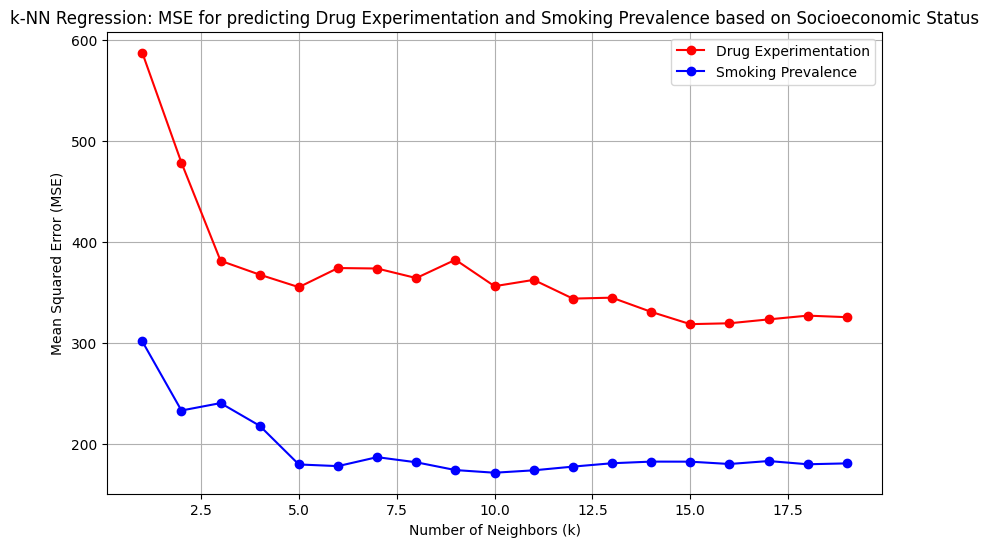

In [17]:
#SocioEconomic Status as The Main Contributer as the prediction
#This defines the difference whether people are more more presumable towards drug use or smoking based on their social status

# Check if all required columns are there
if 'Socioeconomic_Status' in df_fitlered.columns and 'Drug_Experimentation' in df_fitlered.columns and 'Smoking_Prevalence' in df_fitlered.columns:
    # Ensure no missing or invalid values
    df_fitlered = df_fitlered.dropna(subset=['Socioeconomic_Status', 'Drug_Experimentation', 'Smoking_Prevalence'])

    # Perform the train/test split
    X_train_SES, X_test_SES, y_train_SES, y_test_SES = train_test_split(
        df_fitlered[['Socioeconomic_Status']],  # Predictor
        df_fitlered[['Drug_Experimentation', 'Smoking_Prevalence']],  # Both Targets
        test_size=0.2,
        random_state=42
    )
else:
    print("Required columns not found in df_fitlered.")

# Scale the features
X_train_SES_scaled = scaler.fit_transform(X_train_SES)
X_test_SES_scaled = scaler.fit_transform(X_test_SES)

# Training and evaluating the model for multiple outputs
mse_values_SES_drug = []
mse_values_SES_smoking = []

for k in range(1, 20):
    knn = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=k))
    knn.fit(X_train_SES_scaled, y_train_SES)
    y_pred_SES = knn.predict(X_test_SES_scaled)

    # Compute MSE for both targets
    mse_drug = mean_squared_error(y_test_SES['Drug_Experimentation'], y_pred_SES[:, 0])
    mse_smoking = mean_squared_error(y_test_SES['Smoking_Prevalence'], y_pred_SES[:, 1])

    mse_values_SES_drug.append(mse_drug)
    mse_values_SES_smoking.append(mse_smoking)

# Plot results for both targets
plt.figure(figsize=(10, 6))

plt.plot(range(1, 20), mse_values_SES_drug, marker='o', label="Drug Experimentation", color='red')
plt.plot(range(1, 20), mse_values_SES_smoking, marker='o', label="Smoking Prevalence", color='blue')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("k-NN Regression: MSE for predicting Drug Experimentation and Smoking Prevalence based on Socioeconomic Status")
plt.legend()
plt.grid(True)

plt.show()

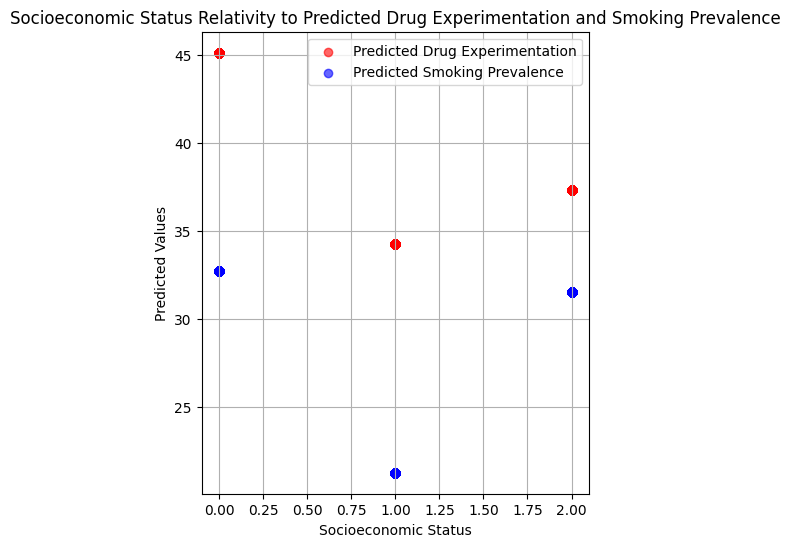

In [18]:
#Showing Social Status Data Trained set with more exact plot in relation of the data values
#This defines the difference whether people are more more presumable towards drug use or smoking based on their social status

knn_SES = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=3))  
knn_SES.fit(X_train_SES, y_train_SES)

# Make predictions
y_pred_SES = knn_SES.predict(X_test_SES)

# Plot Socioeconomic Status effect on Predicted Drug Experimentation and Smoking Prevalence
plt.figure(figsize=(5, 6))

# Scatter for Drug Experimentation
plt.scatter(X_test_SES, y_pred_SES[:, 0], color='red', alpha=0.6, label='Predicted Drug Experimentation')

# Scatter for Smoking Prevalence
plt.scatter(X_test_SES, y_pred_SES[:, 1], color='blue', alpha=0.6, label='Predicted Smoking Prevalence')

# Labels and Title
plt.xlabel("Socioeconomic Status")
plt.ylabel("Predicted Values")
plt.title("Socioeconomic Status Relativity to Predicted Drug Experimentation and Smoking Prevalence")
plt.legend()
plt.grid(True)

plt.show()

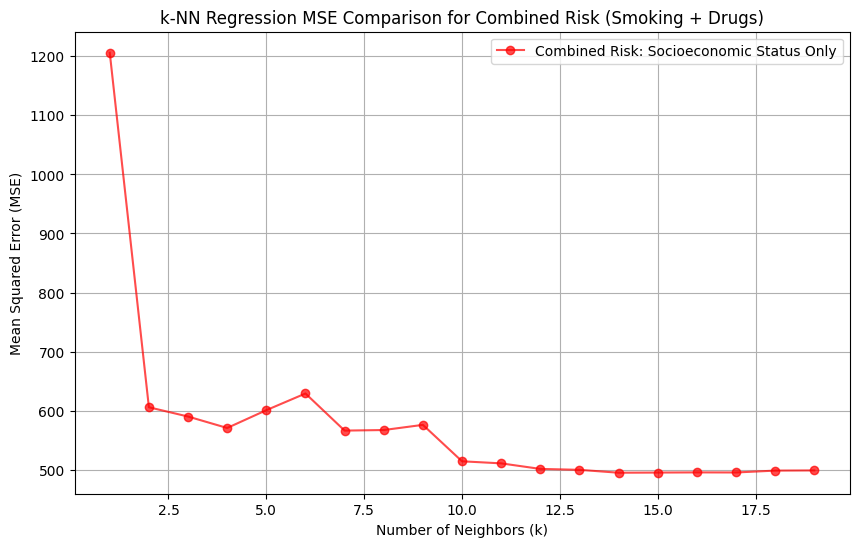

In [19]:
# Combining the Smoking and Drug predictions based on socioeconomic status
mse_values_SES_combined = []  # Socioeconomic Status only

# Train and calculate MSE for Combined Risk predictions for Socioeconomic Status only
X_train_SES, X_test_SES, y_train_SES, y_test_SES = train_test_split(
    df_fitlered[["Socioeconomic_Status"]],  # Only Socioeconomic Status as predictor
    df_fitlered["Combined_Risk"],  # Combined target
    test_size=0.2,
    random_state=42
)

for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_SES, y_train_SES)  # Train on Socioeconomic Status
    y_pred_SES_combined = knn.predict(X_test_SES)  # Predict combined risk
    mse_combined_SES = mean_squared_error(y_test_SES, y_pred_SES_combined)  # Compute MSE
    mse_values_SES_combined.append(mse_combined_SES)

# Setting Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), mse_values_SES_combined, marker='o', color='red', alpha=0.7, label="Combined Risk: Socioeconomic Status Only")

# Customize the plot
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("k-NN Regression MSE Comparison for Combined Risk (Smoking + Drugs)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

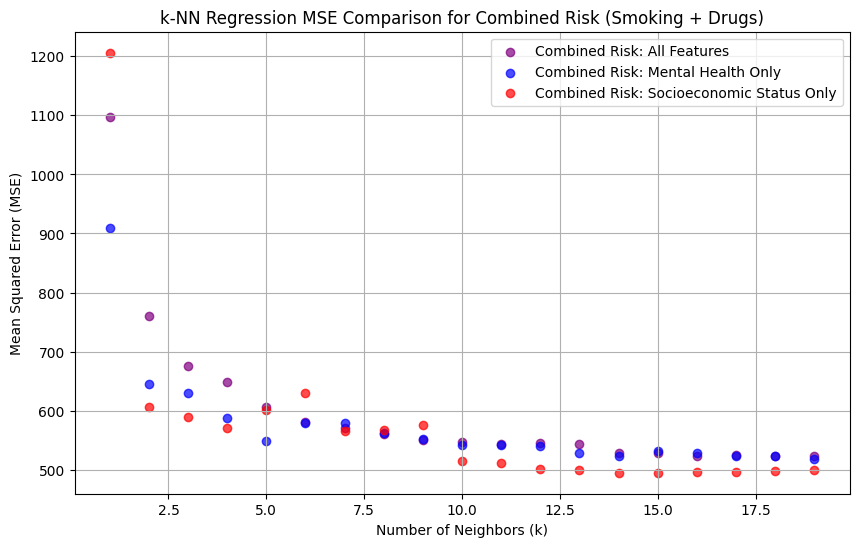

In [20]:
#Comparing all the stats together this includes
#Combined of Mental Health and Social Status
#Mental Health only
#Social Status

# Combined plot for comparison
plt.figure(figsize=(10, 6))

# Plot for Combined stats of all

# I set this to show the combination of mental health and social status in terms of the substance use being likely
plt.scatter(range(1, 20), mse_values_combined, marker='o', color='purple', alpha=0.7, label="Combined Risk: All Features")

# I set this as blue because the results indicating drug and smoke use are more related to lower scores of mental health
# Indicating that these substances are relief for these people
plt.scatter(range(1, 20), mse_values_mental_combined, marker='o', color='blue', alpha=0.7, label="Combined Risk: Mental Health Only")

# I set this as red due to the results indicating that people of lower social status would be more likely
# to fall into substance misuse or fall to these substances as a relief
plt.scatter(range(1, 20), mse_values_SES_combined, marker='o', color='red', alpha=0.7, label="Combined Risk: Socioeconomic Status Only")

# Customize the plot
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("k-NN Regression MSE Comparison for Combined Risk (Smoking + Drugs)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
